In [1]:
# project: p9
# submitter-netid: shizmi
# partner-netid: none

In [2]:
import os, json, csv, collections, statistics
from operator import attrgetter

In [3]:
#q1
files = os.listdir(os.path.join("sample_data"))
sorted(files,reverse=True)

['2.json', '2.csv', '1.json', '1.csv']

In [4]:
def paths(directory):
    filePaths = []
    files = os.listdir(directory)
    for i in range(len(files)):
        filePaths.append(os.path.join(directory,files[i]))
    return sorted(filePaths,reverse=True)
    

In [5]:
#q2
paths(os.path.join("sample_data"))

['sample_data\\2.json',
 'sample_data\\2.csv',
 'sample_data\\1.json',
 'sample_data\\1.csv']

In [6]:
#q3
paths(os.path.join("full_data"))

['full_data\\meta.info',
 'full_data\\agency_info',
 'full_data\\5.json',
 'full_data\\5.csv',
 'full_data\\4.json',
 'full_data\\4.csv',
 'full_data\\3.json',
 'full_data\\3.csv',
 'full_data\\2.json',
 'full_data\\2.csv',
 'full_data\\1.json',
 'full_data\\1.csv']

In [7]:
def filterList(paths):
    files = os.listdir(paths)
    newlist = []
    for file in files:
        if ".csv" in file or ".json" in file:
            newPath = os.path.join(paths,file)
            newlist.append(newPath)
    return newlist

In [8]:
#q4
sorted(filterList("sample_data"),reverse=True)

['sample_data\\2.json',
 'sample_data\\2.csv',
 'sample_data\\1.json',
 'sample_data\\1.csv']

In [9]:
#q5
sorted(filterList("full_data"),reverse=True)

['full_data\\5.json',
 'full_data\\5.csv',
 'full_data\\4.json',
 'full_data\\4.csv',
 'full_data\\3.json',
 'full_data\\3.csv',
 'full_data\\2.json',
 'full_data\\2.csv',
 'full_data\\1.json',
 'full_data\\1.csv']

In [10]:
def calcnum(num_liked):
    num = num_liked
    if type(num_liked) == int:
        return num_liked
    if "b" == num[-1].lower():
        num = num[:-1]
        return int(num)*1000000000
    elif "m" == num[-1].lower():
        num = num[:-1]
        return int(num)*1000000
    elif "k" == num[-1].lower():
        num = num[:-1]
        return int(num)*1000
    else:
        return num
    
def tweetsPresent(directory,file):
    Tweet = collections.namedtuple('Tweet',['tweet_id','username','num_liked', 'length'])
    listTweets = []
    if ".csv" in file:
        f = open(os.path.join(directory,file), encoding="utf-8")
        reader = csv.DictReader(f)
        for row in reader:
            if row['num_liked']== None or row['tweet_text']==None or row['is_retweet']==None:
                continue
            else:
                listTweets.append(Tweet(row['tweet_id'], row['username'], int(row['num_liked']), len(row['tweet_text'])))
    if ".json" in file:
        try:
            f = open(os.path.join(directory,file), encoding="utf-8")
            data = json.loads(f.read())
            f.close()
        except:
            return listTweets
        for key in data:
            if data[key] == None:
                continue
            for header in data[key]:
                number = calcnum(data[key]['num_liked'])
                if type(data[key]['num_liked']) == str:
                    if 'unkown' in data[key]['num_liked'] or 'unkown' in data[key]['num_liked']:
                        number = 0
                if Tweet(key, data[key]['username'],number,len(data[key]['tweet_text'])) not in listTweets:
                    listTweets.append(Tweet(key, data[key]['username'],number,len(data[key]['tweet_text'])))
                    
    return listTweets

In [11]:
#q6
tweetsPresent("sample_data","1.csv")

[Tweet(tweet_id='1467811372', username='USERID_6', num_liked=5882, length=29),
 Tweet(tweet_id='1467811592', username='USERID_8', num_liked=2676, length=11),
 Tweet(tweet_id='1467811594', username='USERID_9', num_liked=2182, length=99),
 Tweet(tweet_id='1467811795', username='USERID_1', num_liked=7791, length=36),
 Tweet(tweet_id='1467812025', username='USERID_1', num_liked=8149, length=25)]

In [12]:
#q7
tweetsPresent("sample_data","2.csv")

[Tweet(tweet_id='1467812799', username='USERID_7', num_liked=3340, length=103),
 Tweet(tweet_id='1467812964', username='USERID_10', num_liked=3684, length=93),
 Tweet(tweet_id='1467813137', username='USERID_5', num_liked=6816, length=20),
 Tweet(tweet_id='1467813579', username='USERID_1', num_liked=1348, length=64),
 Tweet(tweet_id='1467813782', username='USERID_1', num_liked=4770, length=79)]

In [13]:
#q8
tweetsPresent("full_data","1.csv")

[Tweet(tweet_id='1467844540', username='USERID_9', num_liked=6366, length=49),
 Tweet(tweet_id='1467844907', username='USERID_3', num_liked=8770, length=42),
 Tweet(tweet_id='1467845095', username='USERID_4', num_liked=8567, length=126),
 Tweet(tweet_id='1467845157', username='USERID_8', num_liked=5761, length=17),
 Tweet(tweet_id='1467852031', username='USERID_2', num_liked=4565, length=63),
 Tweet(tweet_id='1467852067', username='USERID_4', num_liked=9594, length=34),
 Tweet(tweet_id='1467852789', username='USERID_10', num_liked=686, length=44),
 Tweet(tweet_id='1467853135', username='USERID_1', num_liked=6515, length=131),
 Tweet(tweet_id='1467853356', username='USERID_10', num_liked=3192, length=136),
 Tweet(tweet_id='1467853431', username='USERID_10', num_liked=9936, length=30),
 Tweet(tweet_id='1467853479', username='USERID_9', num_liked=4939, length=24),
 Tweet(tweet_id='1467854062', username='USERID_10', num_liked=9346, length=92),
 Tweet(tweet_id='1467854345', username='USERID

In [14]:
#q9
tweetsPresent("full_data","2.csv")

[Tweet(tweet_id='1467876711', username='USERID_10', num_liked=1117, length=84),
 Tweet(tweet_id='1467877496', username='USERID_1', num_liked=2062, length=106),
 Tweet(tweet_id='1467877833', username='USERID_2', num_liked=4270, length=89),
 Tweet(tweet_id='1467877865', username='USERID_1', num_liked=5899, length=30),
 Tweet(tweet_id='1467878057', username='USERID_6', num_liked=703, length=42),
 Tweet(tweet_id='1467878557', username='USERID_6', num_liked=5814, length=61),
 Tweet(tweet_id='1467878633', username='USERID_2', num_liked=2351, length=33),
 Tweet(tweet_id='1467878971', username='USERID_2', num_liked=2238, length=27),
 Tweet(tweet_id='1467878983', username='USERID_8', num_liked=4860, length=61),
 Tweet(tweet_id='1467879480', username='USERID_4', num_liked=1345, length=97),
 Tweet(tweet_id='1467879984', username='USERID_2', num_liked=3694, length=69),
 Tweet(tweet_id='1467880085', username='USERID_4', num_liked=2478, length=120),
 Tweet(tweet_id='1467880431', username='USERID_3',

In [15]:
#q10
tweetsPresent("sample_data","1.json")

[Tweet(tweet_id='1467810369', username='USERID_4', num_liked=315, length=115),
 Tweet(tweet_id='1467810672', username='USERID_8', num_liked=5298, length=111),
 Tweet(tweet_id='1467810917', username='USERID_8', num_liked=533, length=89),
 Tweet(tweet_id='1467811184', username='USERID_6', num_liked=2650, length=47),
 Tweet(tweet_id='1467811193', username='USERID_8', num_liked=2101, length=111)]

In [16]:
#q11
tweetsPresent("sample_data","2.json")

[Tweet(tweet_id='1467812416', username='USERID_9', num_liked=5278, length=43),
 Tweet(tweet_id='1467812579', username='USERID_1', num_liked=9700, length=26),
 Tweet(tweet_id='1467812723', username='USERID_3', num_liked=5414, length=94),
 Tweet(tweet_id='1467812771', username='USERID_8', num_liked=2190, length=77),
 Tweet(tweet_id='1467812784', username='USERID_10', num_liked=2667, length=117)]

In [17]:
#q12
tweetsPresent("full_data","5.json")

[Tweet(tweet_id='1467944581', username='USERID_1', num_liked=7216, length=131),
 Tweet(tweet_id='1467944654', username='USERID_7', num_liked=2838, length=59),
 Tweet(tweet_id='1467944871', username='USERID_1', num_liked=9393, length=51),
 Tweet(tweet_id='1467945476', username='USERID_10', num_liked=9246, length=33),
 Tweet(tweet_id='1467945704', username='USERID_1', num_liked=526, length=62),
 Tweet(tweet_id='1467945787', username='USERID_9', num_liked=8850, length=81),
 Tweet(tweet_id='1467945885', username='USERID_4', num_liked=9403, length=67),
 Tweet(tweet_id='1467946026', username='USERID_1', num_liked=2861, length=69),
 Tweet(tweet_id='1467946137', username='USERID_1', num_liked=5470, length=135),
 Tweet(tweet_id='1467946559', username='USERID_6', num_liked=987, length=116),
 Tweet(tweet_id='1467946592', username='USERID_3', num_liked=9085, length=137),
 Tweet(tweet_id='1467946749', username='USERID_4', num_liked=3381, length=42),
 Tweet(tweet_id='1467946810', username='USERID_4'

In [18]:
#q13
tweetsPresent("full_data","1.json")

[]

In [19]:
def listfiles(directory, key):
    files = os.listdir(directory)
    for i in range(len(files)):
        listFiles = tweetsPresent(directory,files[i])
        for j in range(len(listFiles)):
            if listFiles[j][0] == key:
                return os.path.join(directory,files[i])
    return False

In [20]:
#q14
listfiles("sample_data", "1467813137")

'sample_data\\2.csv'

In [21]:
#q15
listfiles("full_data", '1467862937')

False

In [22]:
#q16
listfiles("full_data", '1467907751')

'full_data\\3.csv'

In [23]:
#q17
files = os.listdir(os.path.join("sample_data"))
filesList = []
listafter = []
for i in range(len(files)):
    listFiles = tweetsPresent("sample_data",files[i])
    for j in range(len(listFiles)):
        if listFiles[j][1] == "USERID_1" and files[i] not in filesList:
            filesList.append(files[i])
for i in range(len(filesList)):
    listafter.append(os.path.join("sample_data",filesList[i]))
                     
sorted(listafter, reverse=True)

['sample_data\\2.json', 'sample_data\\2.csv', 'sample_data\\1.csv']

In [24]:
def alltweets(directory, sortby='num_liked',option=False):
    files = os.listdir(directory)
    fullList = []
    for i in range(len(files)):
        innerlist = tweetsPresent(directory,files[i])
        if len(innerlist) == 0:
            continue
        for j in range(len(innerlist)):
            fullList.append(innerlist[j])
    return sorted(fullList,key=attrgetter(sortby),reverse= option)

In [25]:
#q18
alltweets("sample_data",'tweet_id',False )

[Tweet(tweet_id='1467810369', username='USERID_4', num_liked=315, length=115),
 Tweet(tweet_id='1467810672', username='USERID_8', num_liked=5298, length=111),
 Tweet(tweet_id='1467810917', username='USERID_8', num_liked=533, length=89),
 Tweet(tweet_id='1467811184', username='USERID_6', num_liked=2650, length=47),
 Tweet(tweet_id='1467811193', username='USERID_8', num_liked=2101, length=111),
 Tweet(tweet_id='1467811372', username='USERID_6', num_liked=5882, length=29),
 Tweet(tweet_id='1467811592', username='USERID_8', num_liked=2676, length=11),
 Tweet(tweet_id='1467811594', username='USERID_9', num_liked=2182, length=99),
 Tweet(tweet_id='1467811795', username='USERID_1', num_liked=7791, length=36),
 Tweet(tweet_id='1467812025', username='USERID_1', num_liked=8149, length=25),
 Tweet(tweet_id='1467812416', username='USERID_9', num_liked=5278, length=43),
 Tweet(tweet_id='1467812579', username='USERID_1', num_liked=9700, length=26),
 Tweet(tweet_id='1467812723', username='USERID_3', 

In [26]:
#q19
alltweets("sample_data","num_liked",True)

[Tweet(tweet_id='1467812579', username='USERID_1', num_liked=9700, length=26),
 Tweet(tweet_id='1467812025', username='USERID_1', num_liked=8149, length=25),
 Tweet(tweet_id='1467811795', username='USERID_1', num_liked=7791, length=36),
 Tweet(tweet_id='1467813137', username='USERID_5', num_liked=6816, length=20),
 Tweet(tweet_id='1467811372', username='USERID_6', num_liked=5882, length=29),
 Tweet(tweet_id='1467812723', username='USERID_3', num_liked=5414, length=94),
 Tweet(tweet_id='1467810672', username='USERID_8', num_liked=5298, length=111),
 Tweet(tweet_id='1467812416', username='USERID_9', num_liked=5278, length=43),
 Tweet(tweet_id='1467813782', username='USERID_1', num_liked=4770, length=79),
 Tweet(tweet_id='1467812964', username='USERID_10', num_liked=3684, length=93),
 Tweet(tweet_id='1467812799', username='USERID_7', num_liked=3340, length=103),
 Tweet(tweet_id='1467811592', username='USERID_8', num_liked=2676, length=11),
 Tweet(tweet_id='1467812784', username='USERID_10

In [27]:
#q20 
alltweets("full_data", "num_liked", True)[:20]

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked=869000000, length=136),
 Tweet(tweet_id='1467894600', username='USERID_8', num_liked=915000, length=67),
 Tweet(tweet_id='1467853431', username='USERID_10', num_liked=9936, length=30),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467860904', username='USERID_7', num_liked=9851, length=30),
 Tweet(tweet_id='1467928014', username='USERID_7', num_liked=9830, length=18),
 Tweet(tweet_id='1467895048', username='USERID_10', num_liked=9822, length=136),
 Tweet(tweet_id='1467966646', username='USERID_7', num_liked=9821, length=47),
 Tweet(tweet_id='1467855673', username='USERID_9', num_liked=9728, length=72),
 Tweet(tweet_id='1467898078', username='USERID_10', num_liked=9705, length=104),
 Tweet(tweet_id='1467928300', username='USERID_9', num_liked=9681, length=79),
 Tweet(tweet_id='1467917177', username='USERID_3', num_liked=9678, length=105),
 Tweet(tweet_id='1467923235', username

In [28]:
#q21
len(alltweets("full_data"))

445

In [29]:
#q22
USERNAMES = {'USERID_4'}
tweets = alltweets("full_data")
for header in tweets:
    USERNAMES.add(header[1])
USERNAMES

{'USERID_1',
 'USERID_10',
 'USERID_2',
 'USERID_3',
 'USERID_4',
 'USERID_5',
 'USERID_6',
 'USERID_7',
 'USERID_8',
 'USERID_9'}

In [30]:
def getNumTweets(username,tweet):
    tweets = tweet
    count = 0
    for header in tweets:
        if header[1] == username:
            count+=1
    return count

In [31]:
#q23
userTweetAmount = {}
tweets = alltweets("full_data")
for i in tweets:
    userTweetAmount[i[1]] = getNumTweets(i[1],tweets)
userTweetAmount

{'USERID_10': 45,
 'USERID_3': 39,
 'USERID_8': 31,
 'USERID_6': 51,
 'USERID_1': 52,
 'USERID_9': 44,
 'USERID_2': 47,
 'USERID_7': 55,
 'USERID_4': 35,
 'USERID_5': 46}

In [32]:
def avglikes(username,tweet):
    average = 0
    count =0
    tweets = tweet
    for header in tweets:
        if header[1] == username:
            average+=header[2]
            count+=1
    return average/count

In [33]:
#q24
avglikeUsers = {}
tweets = alltweets("full_data")
for i in tweets:
    avglikeUsers[i[1]] = avglikes(i[1],tweets)
avglikeUsers

{'USERID_10': 5728.777777777777,
 'USERID_3': 5023.820512820513,
 'USERID_8': 34463.45161290323,
 'USERID_6': 4559.588235294118,
 'USERID_1': 4369.115384615385,
 'USERID_9': 5334.386363636364,
 'USERID_2': 18494258.80851064,
 'USERID_7': 5079.436363636363,
 'USERID_4': 4578.8,
 'USERID_5': 4583.130434782609}

In [34]:
def avglen(username,tweet):
    average = 0
    count =0
    tweets = tweet
    for header in tweets:
        if header[1] == username:
            average+=header[3]
            count+=1
    return average/count

In [35]:
#q25
avglenUsers = {}
tweets = alltweets("full_data")
for i in tweets:
    avglenUsers[i[1]] = avglen(i[1],tweets)
avglenUsers

{'USERID_10': 72.71111111111111,
 'USERID_3': 67.15384615384616,
 'USERID_8': 73.96774193548387,
 'USERID_6': 73.68627450980392,
 'USERID_1': 81.86538461538461,
 'USERID_9': 78.36363636363636,
 'USERID_2': 79.51063829787235,
 'USERID_7': 72.96363636363637,
 'USERID_4': 73.91428571428571,
 'USERID_5': 73.69565217391305}

In [36]:
%matplotlib inline

In [37]:
import pandas as pd

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

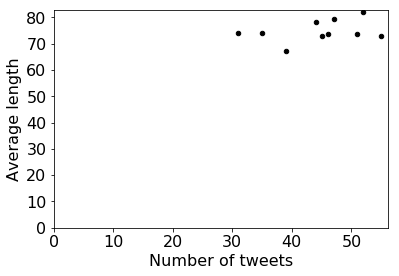

In [38]:
#q26
listOfLengths = []
listOfTweets = []
for user in userTweetAmount:
    listOfTweets.append(userTweetAmount.get(user))
for user in avglenUsers:
    listOfLengths.append(avglenUsers.get(user))
scatter(listOfTweets,listOfLengths,xlabel='Number of tweets', ylabel='Average length')

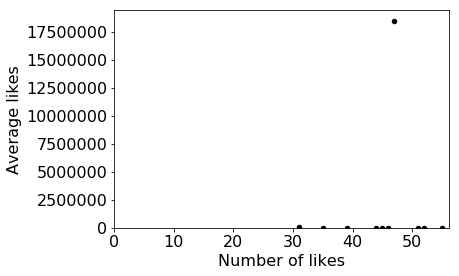

In [39]:
#q27
listOfLikes = []
for user in avglikeUsers:
    listOfLikes.append(avglikeUsers.get(user))
scatter(listOfTweets,listOfLikes, xlabel='Number of likes', ylabel='Average likes')

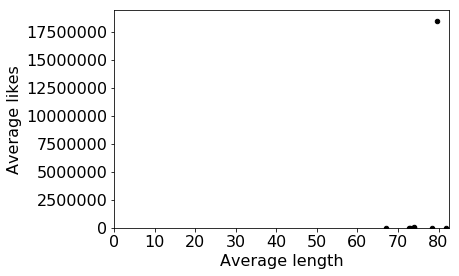

In [40]:
#q28
scatter(listOfLengths,listOfLikes,xlabel='Average length',ylabel='Average likes')

In [41]:
#q29
highest = 0
outlier = ' '
for user in avglikeUsers:
    if highest < avglikeUsers.get(user):
        highest = avglikeUsers.get(user)
        outlier = user
outlier

'USERID_2'

In [42]:
#q30
tweetsOutlier = []
tweets
for i in range(len(tweets)):
    if tweets[i][1] == outlier:
        tweetsOutlier.append(tweets[i])
sorted(tweetsOutlier,key=attrgetter('num_liked'), reverse=True)

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked=869000000, length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USE

In [43]:
#q31
total = 0
most_liked = 0
for i in range(len(tweetsOutlier)):
    if most_liked < tweetsOutlier[i][2]:
        most_liked = tweetsOutlier[i][2]
    total += tweetsOutlier[i][2]
(most_liked/total) * 100

99.97352093731529

In [44]:
#q32
newTotal = 0
for i in range(len(tweetsOutlier)):
    if tweetsOutlier[i][2] == most_liked:
        tweetsOutlier.remove(tweetsOutlier[i])
for i in range(len(tweetsOutlier)):
    newTotal += tweetsOutlier[i][2]
newTotal/len(tweetsOutlier)

5003.565217391304

In [45]:
def getFiles(directory):
    files = []
    if os.path.isfile(directory):
        return directory
    if os.path.isdir(directory):
        directoryList = os.listdir(directory)
        for i in range(len(directoryList)):
            paths = getFiles(os.path.join(directory,directoryList[i]))
            if type(paths) == list:
                if len(paths) == 0:
                    continue
                for j in range(len(paths)):
                    files.append(paths[j])
            else:
                files.append(getFiles(os.path.join(directory,directoryList[i])))
    return files

In [46]:
#q33
sorted(getFiles(os.path.join("play","rb","rb9")),reverse = True)

['play\\rb\\rb9\\89.csv', 'play\\rb\\rb9\\12.xls']

In [47]:
#q34
sorted(getFiles(os.path.join("play","ls")),reverse=True)

['play\\ls\\qwe\\usun.pdf',
 'play\\ls\\qwe\\iuqwe.json',
 'play\\ls\\mf.py',
 'play\\ls\\lu.txt']

In [48]:
#q35
sorted(getFiles(os.path.join("play","ou")),reverse=True)

['play\\ou\\v',
 'play\\ou\\quap\\uikwe',
 'play\\ou\\quap\\qonxu.txt',
 'play\\ou\\quap\\aoq\\qsonj',
 'play\\ou\\quap\\aoq\\aqnsa',
 'play\\ou\\b',
 'play\\ou\\a']

In [49]:
#q36
sorted(getFiles(os.path.join('play')),reverse=True)

['play\\rb\\rb9\\89.csv',
 'play\\rb\\rb9\\12.xls',
 'play\\rb\\ppt.ppt',
 'play\\ou\\v',
 'play\\ou\\quap\\uikwe',
 'play\\ou\\quap\\qonxu.txt',
 'play\\ou\\quap\\aoq\\qsonj',
 'play\\ou\\quap\\aoq\\aqnsa',
 'play\\ou\\b',
 'play\\ou\\a',
 'play\\ls\\qwe\\usun.pdf',
 'play\\ls\\qwe\\iuqwe.json',
 'play\\ls\\mf.py',
 'play\\ls\\lu.txt']

In [50]:
#q37
sorted(getFiles(os.path.join('recursive','others')),reverse=True)

['recursive\\others\\USERID_9.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_10.json']

In [51]:
#q38
sorted(getFiles(os.path.join('recursive')),reverse=True)

['recursive\\others\\USERID_9.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_10.json',
 'recursive\\USERID_4\\true\\tweets.json',
 'recursive\\USERID_4\\false\\tweets.json',
 'recursive\\USERID_3\\tweets.json',
 'recursive\\USERID_2\\tweets.json',
 'recursive\\USERID_1\\tweets.json']

In [52]:
def tweetAmount(path):
    path = path[10:]
    return len(tweetsPresent('recursive',path))

In [53]:
#q39
total = 0
paths = getFiles(os.path.join('recursive','USERID_4'))
for i in range(len(paths)):
    total+=tweetAmount(paths[i])
total

17

In [54]:
#q40
total = 0
paths = getFiles(os.path.join('recursive'))
for i in range(len(paths)):
    total+=tweetAmount(paths[i])
total

200